### Objetivo

#### En este anáñisis de cierto datos de mercadeo, el objetivo de este proyecto es el siguiente:

* Contailizar los datos.
* Limpiar los datos.
* Desarrollar algunas preguntas para el análisis.
* Tener respuestas y conclusiones para estas preguntas.

#### Datos

##### los datos fueron sacados de la pagina Kaggle

https://www.kaggle.com/jackdaoud/marketing-data

### Carga de datos

##### Primero, tener la librerias necesarias para este proyecto.

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re


In [34]:
mercadeo = pd.read_csv("marketing_data.csv")
pd.set_option('display.max_columns', None)
print(mercadeo.head(10))

      id  YearBirth   Education MaritalStatus       Income  Kidhome  Teenhome  \
0   1826       1970  Graduation      Divorced  $84,835.00         0         0   
1      1       1961  Graduation        Single  $57,091.00         0         0   
2  10476       1958  Graduation       Married  $67,267.00         0         1   
3   1386       1967  Graduation      Together  $32,474.00         1         1   
4   5371       1989  Graduation        Single  $21,474.00         1         0   
5   7348       1958         PhD        Single  $71,691.00         0         0   
6   4073       1954    2n Cycle       Married  $63,564.00         0         0   
7   1991       1967  Graduation      Together  $44,931.00         0         1   
8   4047       1954         PhD       Married  $65,324.00         0         1   
9   9477       1954         PhD       Married  $65,324.00         0         1   

  DtCustomer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0    6/16/14        0       

### Información de los datos

##### Algunas ideas inmediatas son:

* Hay 2440 filas y 28 columnas.
* La mayoria de los datos de las columnas son enteros.
* La columna de income hay perdida de data, hay valores que son enteros y otros reales.
* Algunas estadísticas resumidas básicas sobre cada una de las variables númericas. 

In [35]:
mercadeo.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [36]:
mercadeo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [37]:
mercadeo.isnull().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [38]:
print(mercadeo.describe())

                 id    YearBirth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000

### Limpieza de datos

Como lo mencionamos anteriormente, la columna de ingresos necesita una limpieza, al igual que los nombres de las columnas en general también podrian cambiarse para una mayor coherencia.

* Vamos a poner en un formato mas entendible.
* Cambiaremos income a valores reales.
* Cambiar el formato de las columnas para que se mas legible para python

Vamos a ver la distribucción de income usando el diagrama de caja, para ver si hay valores atípicos, si lo hay vamos a removerlos y para los valores faltantes los remplazaremos con la media.

Tenemos que tener los datos de income ordenados y listos. 

In [39]:
mercadeo["Income"] = mercadeo["Income"].replace("[\$,]","",regex=True).astype(float)
mercadeo.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower() for x in mercadeo.columns]
mercadeo.describe()

,id,year_birth,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_products,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,response,complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Distribucción de Income

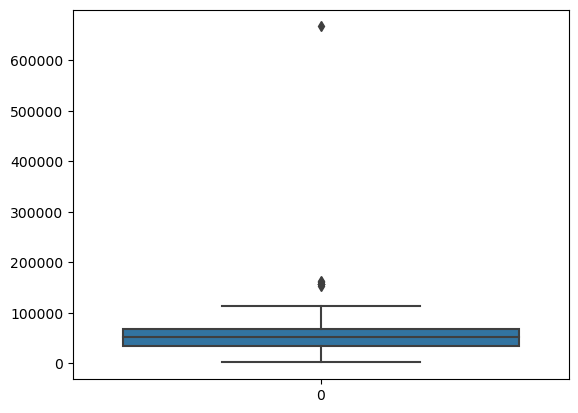

In [40]:
plt.figure()
sns.boxplot(mercadeo.income)
plt.show()

Hay valores atípicos en nuestra distribución por lo que hay que removerlo 

In [42]:
mercadeo = mercadeo[mercadeo.income < 300000]


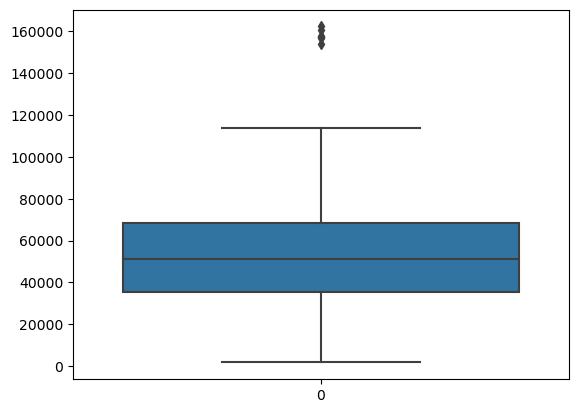

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: income, dtype: float64

In [43]:
plt.figure()
sns.boxplot(mercadeo.income)
plt.show()

mercadeo.income.describe()

Después de eliminar el valor atípico, la distribución es mas simetrica. Tadavía falta algunos valores atípicos; sin embargo, sin que quede con grandes sesgos no grandes valores atípicos, ahora solo falta rellenar los valores que tienen na y la variable de income esta lista para analizar.

In [44]:
mercadeo.income = mercadeo.income.fillna(mercadeo.income.mean())


### Agregar una columna de edad 

Para el DataFrame contiene una columna de year_birth; sin embargo, una columna con la edad de cada cliente puede ser mas facíl de analizar, lo que vamos a hacer es:

* Agregar una nueva columna que se llame age, restadonle 2020 a cada valor de year_birth debido a que los datos son del año 2020
* Y cualquier sesgo o valor atípico será quitado. 

In [46]:
mercadeo["age"] = 2020 - mercadeo["year_birth"]

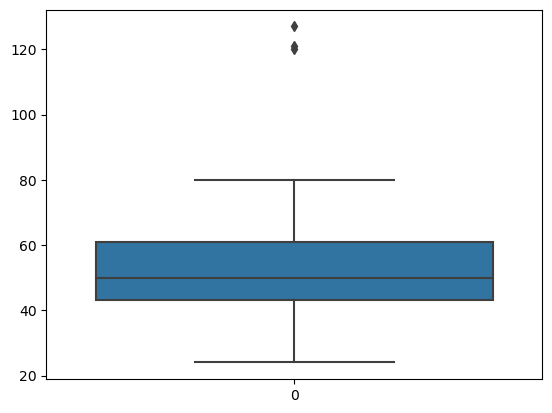

count    2215.000000
mean       51.183296
std        11.987000
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max       127.000000
Name: age, dtype: float64

In [47]:
plt.figure()
sns.boxplot(mercadeo.age)
plt.show()

mercadeo.age.describe()

In [48]:
mercadeo = mercadeo[mercadeo.age < 100]


In [ ]:
plt.figure()
sns.boxplot(mercadeo.age)
plt.show()

mercadeo.age.describe()

Ya quitado los valores atípicos de la columna age la distribución es simetrica y lista para analizar.

### Chequeando la variable educación 

La variable educación es otra columna que podemos enfocar en el análisis. una diagrama de caja es usada si es necesario limpiar. No hay ningún valor faltante o otro problema, asi que lo dejaremos así.  

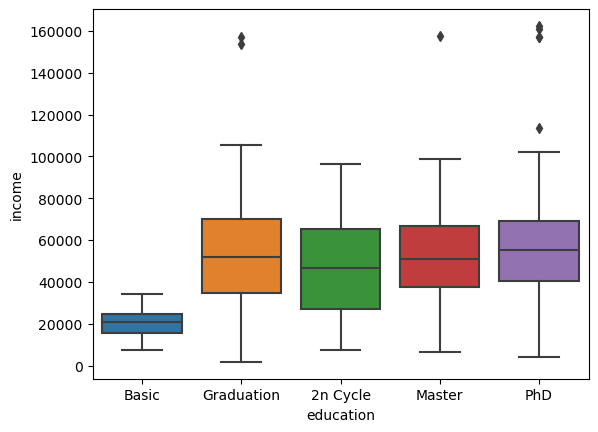

In [49]:
plt.figure()
sns.boxplot(x=mercadeo.education, y= mercadeo.income,  order=["Basic", "Graduation", "2n Cycle", "Master", "PhD"])
plt.show()

### Análisis de datos exploratorios

Despues de hacer ordenamiento y limpieza de datos, El DataFrame esta listo para hacer análisis. Tenemos los siguientes variables independientes:

* income
* age
* education

Nuestro objetivo es ver si nuestras variables independientes tienen una relación con las variables dependientes, nuestras variables dependientes son:

* mnt_wines
* mnt_fruits
* mnt_meat_products
* mnt_fish_products
* mnt_swet_products
* mnt_gold_products
* num_deals_purchases
* num_web_purchases
* num_catalog_purchases
* num_stores_purchases

La esperanza de esto que atraves de un resumen estadístico y con las visualizaciones podemos hacernos la siguientes preguntas:
 
* Si los ingresos influyen en el nivel educativo
* si los ingresos influyen en la edad 

a lo largo de este análisis pueden surgir más preguntas.

### Imagen Grande

Para observar el conjunto de datos como un todo, se utiliza DataFrame.hist(). Ofrece una vista completa de todas las variables numéricas en la distribución. La mayoría de las variables cantidad comprada y número comprado están sesgadas a la derecha y tienen distribuciones similares.

C:\Users\javij\AppData\Local\Temp\ipykernel_14848\3165604162.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  mercadeo.hist(ax=ax);


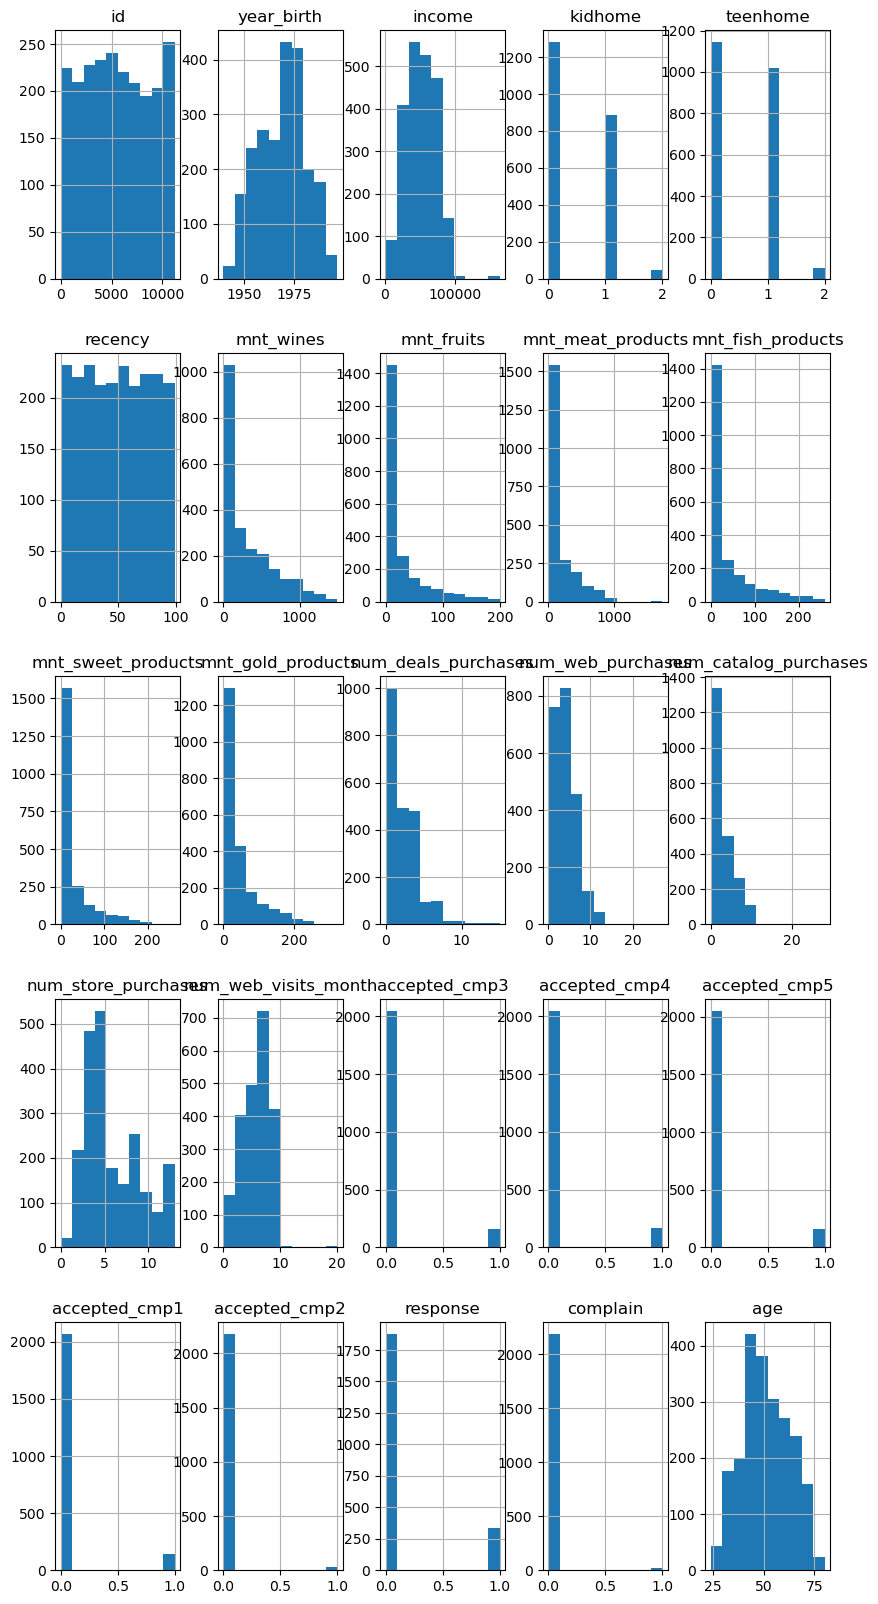

In [55]:
fig= plt.figure(figsize=(10,20))
ax = fig.gca()
mercadeo.hist(ax=ax);

Podemos apreciar todas la variables purchase estan sesgadas a la derecha.

In [54]:
mercadeo.corr()

C:\Users\javij\AppData\Local\Temp\ipykernel_14848\3381758989.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mercadeo.corr()


,id,year_birth,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_products,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,response,complain,age
id,1.000000,0.005086,0.000905,0.000971,-0.003508,-0.044147,-0.018906,0.010008,-0.003706,-0.022405,-0.004381,-0.008013,-0.040849,-0.017232,-0.000404,-0.011733,-0.008610,-0.035668,-0.023692,-0.004441,-0.017989,-0.014901,-0.021112,0.031839,-0.005086
year_birth,0.005086,1.000000,-0.199977,0.237497,-0.361932,-0.015694,-0.164615,-0.013447,-0.033622,-0.041154,-0.021516,-0.059779,-0.066156,-0.162265,-0.125856,-0.138998,0.120282,0.061097,-0.070035,0.019025,-0.011941,-0.007821,0.020937,-0.004602,-1.000000
income,0.000905,-0.199977,1.000000,-0.514523,0.034565,0.007965,0.688209,0.507354,0.692279,0.520040,0.523599,0.388299,-0.108207,0.459265,0.696589,0.631424,-0.650257,-0.015152,0.219633,0.395569,0.327524,0.104036,0.161387,-0.027900,0.199977
kidhome,0.000971,0.237497,-0.514523,1.000000,-0.039066,0.010623,-0.497203,-0.373258,-0.439031,-0.388643,-0.377843,-0.354922,0.216594,-0.372327,-0.504598,-0.501863,0.447258,0.016135,-0.162111,-0.204582,-0.174261,-0.081911,-0.077901,0.037067,-0.237497
teenhome,-0.003508,-0.361932,0.034565,-0.039066,1.000000,0.014392,0.003945,-0.175905,-0.261134,-0.205235,-0.163107,-0.018579,0.386805,0.162239,-0.112477,0.049212,0.130985,-0.042797,0.038168,-0.190119,-0.145198,-0.015633,-0.154402,0.007746,0.361932
recency,-0.044147,-0.015694,0.007965,0.010623,0.014392,1.000000,0.015981,-0.005257,0.022914,0.000788,0.025244,0.018148,0.002591,-0.005680,0.024197,-0.000460,-0.018965,-0.032361,0.017520,0.000233,-0.021147,-0.001429,-0.200114,0.005713,0.015694
mnt_wines,-0.018906,-0.164615,0.688209,-0.497203,0.003945,0.015981,1.000000,0.385844,0.568081,0.396915,0.389583,0.391461,0.009117,0.553663,0.634237,0.640219,-0.321616,0.061360,0.373349,0.472889,0.351610,0.206309,0.246320,-0.036420,0.164615
mnt_fruits,0.010008,-0.013447,0.507354,-0.373258,-0.175905,-0.005257,0.385844,1.000000,0.546740,0.593038,0.571474,0.393459,-0.134191,0.302301,0.485611,0.459875,-0.417741,0.014644,0.006598,0.208990,0.192417,-0.009924,0.123007,-0.002956,0.013447
mnt_meat_products,-0.003706,-0.033622,0.692279,-0.439031,-0.261134,0.022914,0.568081,0.546740,1.000000,0.572986,0.534624,0.357556,-0.121128,0.306841,0.733787,0.486349,-0.539194,0.018416,0.091677,0.375252,0.313379,0.043549,0.237966,-0.021017,0.033622
mnt_fish_products,-0.022405,-0.041154,0.520040,-0.388643,-0.205235,0.000788,0.396915,0.593038,0.572986,1.000000,0.583484,0.426299,-0.143147,0.299428,0.532241,0.457885,-0.446151,-0.000276,0.016058,0.194793,0.261712,0.002322,0.108135,-0.019098,0.041154


C:\Users\javij\AppData\Local\Temp\ipykernel_14848\799882770.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=mercadeo.corr(),annot=False)


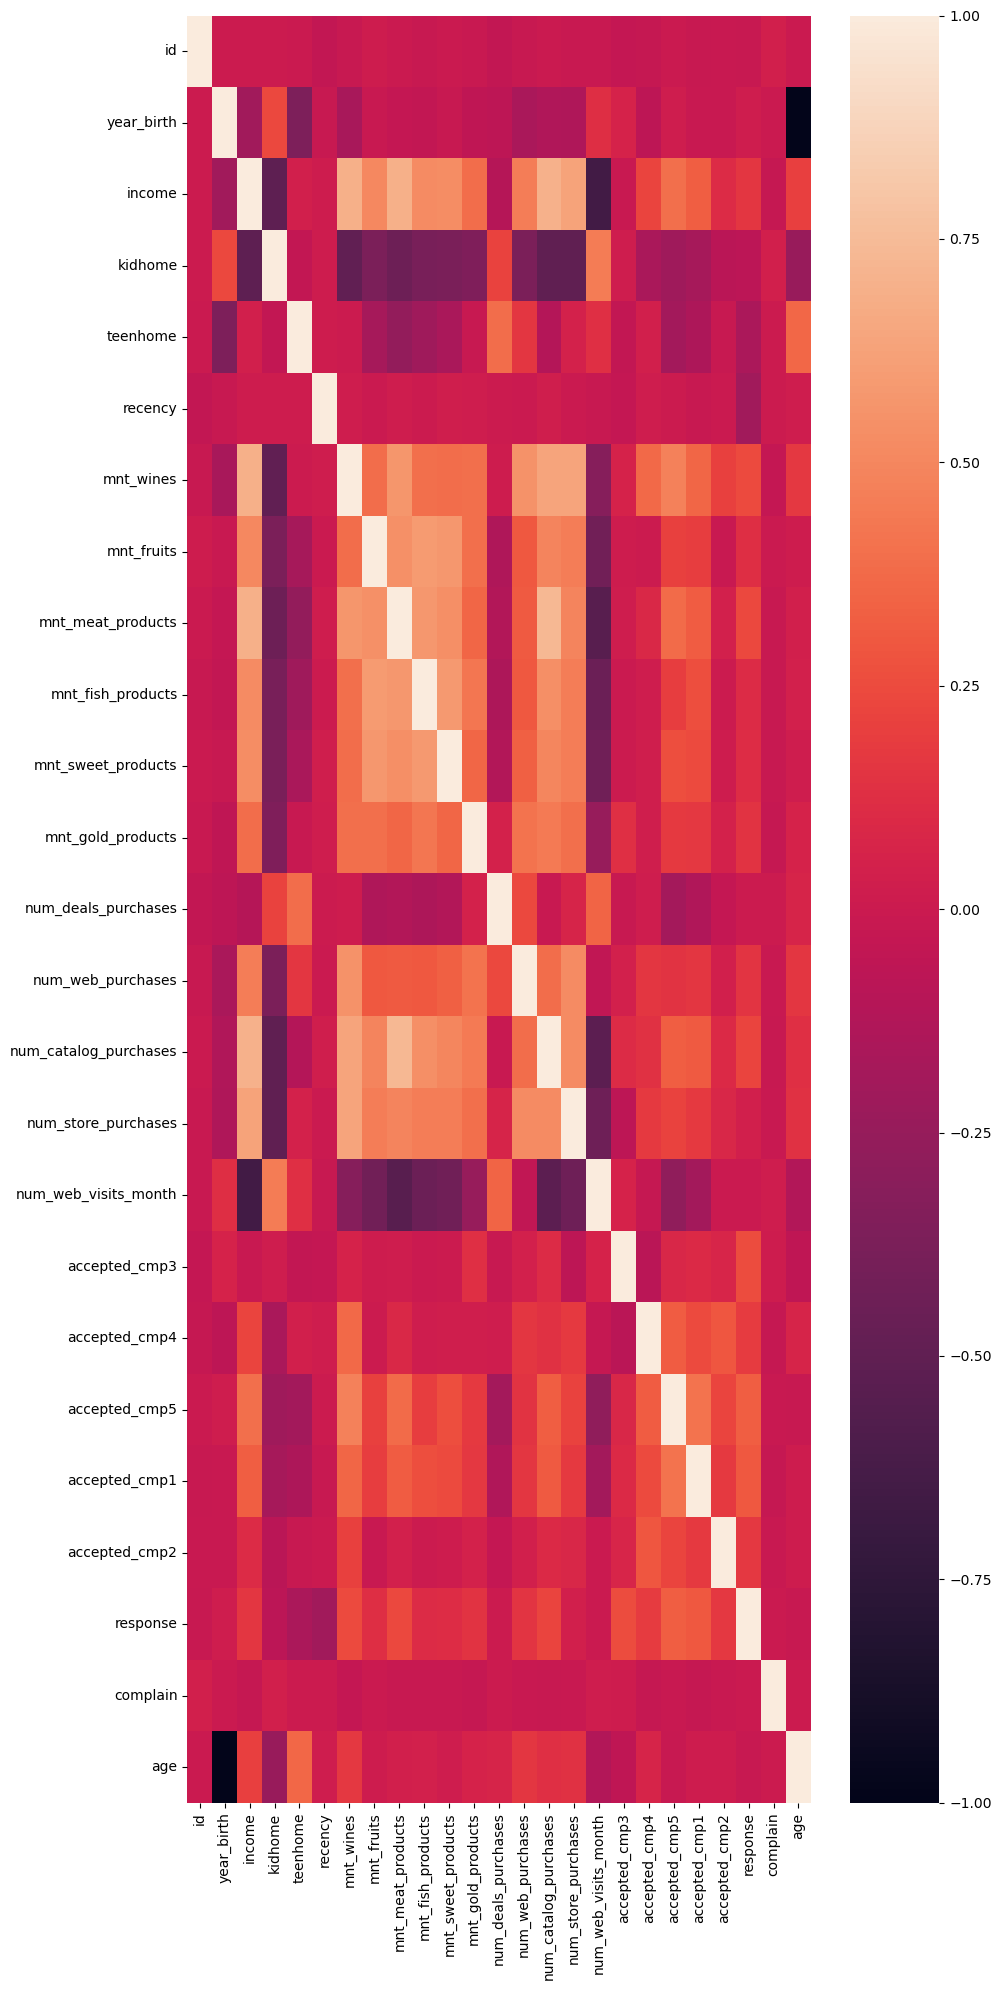

In [56]:
plt.figure(figsize=(10,20))
sns.heatmap(data=mercadeo.corr(),annot=False)
plt.tight_layout()
plt.show()

La tabla de correlación no nos ofrece mucha ayuda dado que hay muchos numeros que leer, sin embargo la variable income en la mejor variable para trabajar en el análisis.

### Comportamiento de compra por ingresos

Ahora es tiempo de buscar preguntas. A for una iteración para ver si hay una relación entre ingresos y para cada num_type_purchases variable, el hue de parametro de la variable educación es usada para ver si hay algun patron entre educacion y los num_type_purchases    

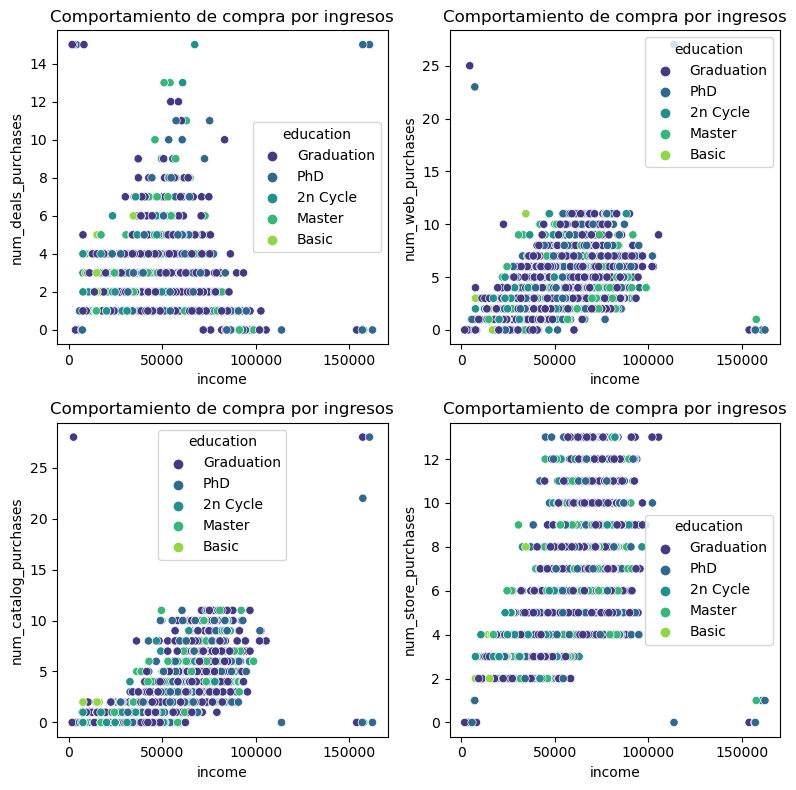

In [57]:
num_purchase_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]

plot=0
fig = plt.figure(figsize=(8,8))
for i in range(len(num_purchase_cols)):
    plot += 1
    ax = plt.subplot(2,2,plot)
    sns.scatterplot(x = mercadeo.income, y= mercadeo[num_purchase_cols[i]], 
                    hue = mercadeo.education, palette= "viridis")
    plt.title("Comportamiento de compra por ingresos")
plt.tight_layout()
plt.show()    

Hay una fuerte relación lineal positiva entre income y con las siguientes variables:

* num_web_purchases
* num_catalog_purchases
* num_store_purchases

Sin embargo, entre ingresos y Num_Deals_Purchaes no existe una relación obvia. Parece que puede haber una relación lineal negativa débil, pero no es lo suficientemente fuerte como para tener confianza. También es difícil descifrar cualquier patrón asociado con la educación en las parcelas, por lo que se realizará un análisis más detallado de esta variable.

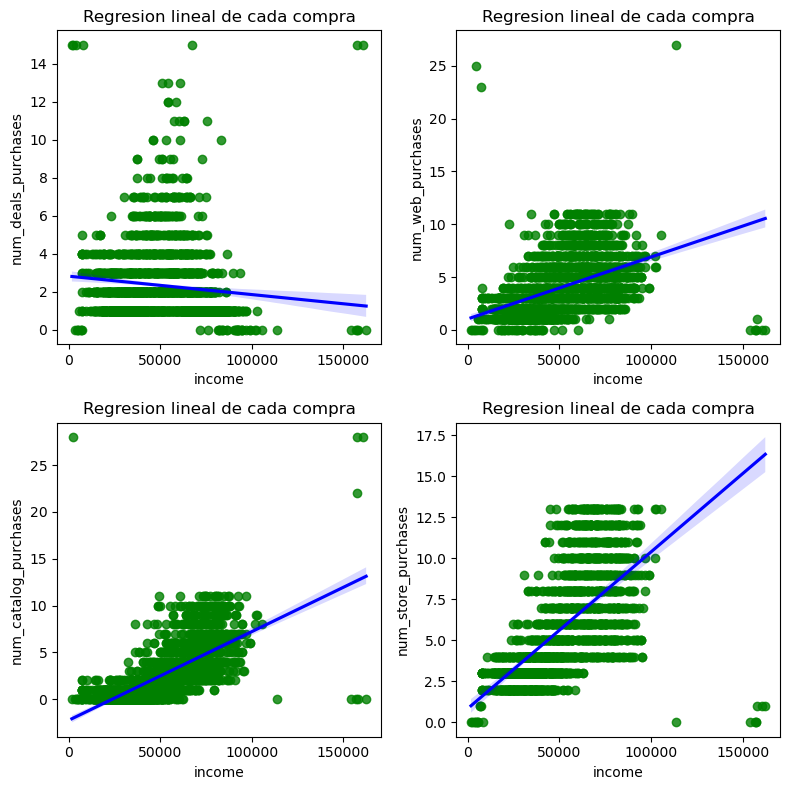

In [58]:
num_purchase_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]

fig = plt.figure(figsize=(8,8))
plot=0

for i in range(len(num_purchase_cols)):
    plot += 1
    ax = plt.subplot(2,2,plot)
    sns.regplot(x=mercadeo.income, y = mercadeo[num_purchase_cols[i]],
                scatter_kws={"color": "green"}, line_kws={"color":"blue"})
    plt.title("Regresion lineal de cada compra")
plt.tight_layout()
plt.show()

Para verlo mejor si hay una relación lineal, .regplot() fue usada, como podemos ver los que tienen una fuerte relacion lineal positiva son num_catalog_purchases, num_store_purchases con income.

Estas graficas también nos muestran que los ingresos de ingresos y num_deal_purchases, tienen una relacion lineal negativa debil.

Para futuros análisis, e agregado una nueva columna en el DataFrame llamado total_purchases, es agregado en el mercadeo DataFrame, que es la suma de todos las variables purchases,vamos hacer el mismo análisis de regresion a ver que encontramos.   

In [59]:
mercadeo["total_purchases"] = mercadeo["num_deals_purchases"] + mercadeo["num_web_purchases"] + mercadeo["num_catalog_purchases"] + mercadeo["num_store_purchases"]

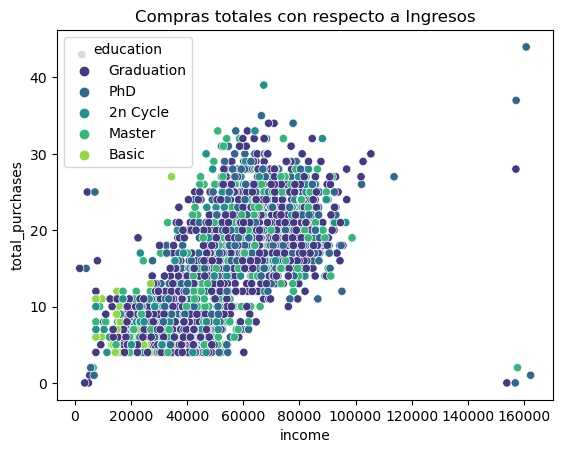

In [60]:
plt.figure()
sns.scatterplot(x=mercadeo["income"], y= mercadeo["total_purchases"],
                hue=mercadeo["education"], palette="viridis")
plt.title("Compras totales con respecto a Ingresos")
plt.show()

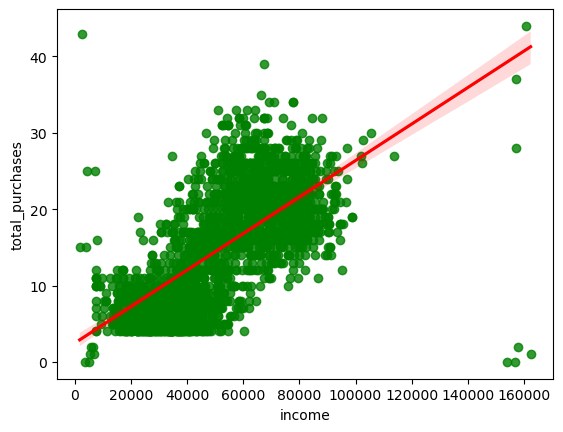

In [61]:
plt.figure()
sns.regplot(x=mercadeo.income, y=mercadeo["total_purchases"],
            scatter_kws={"color":"green"}, line_kws={"color":"red"})
plt.show()

La relación general entre ingresos y compras totales es una regresion lineal solida desafortunamente todavía es dificíl descifrar cualquier relación con la educación y las compras totales ya que los puntos estan muy dispersos.  

### Mas comportamiento de compras por ingreso

Vamos hacer el mismo análisis solo que ahora lo vamos hacer para ingresos (income) y mnt_type_products, a ver si enconramos alguna relación.

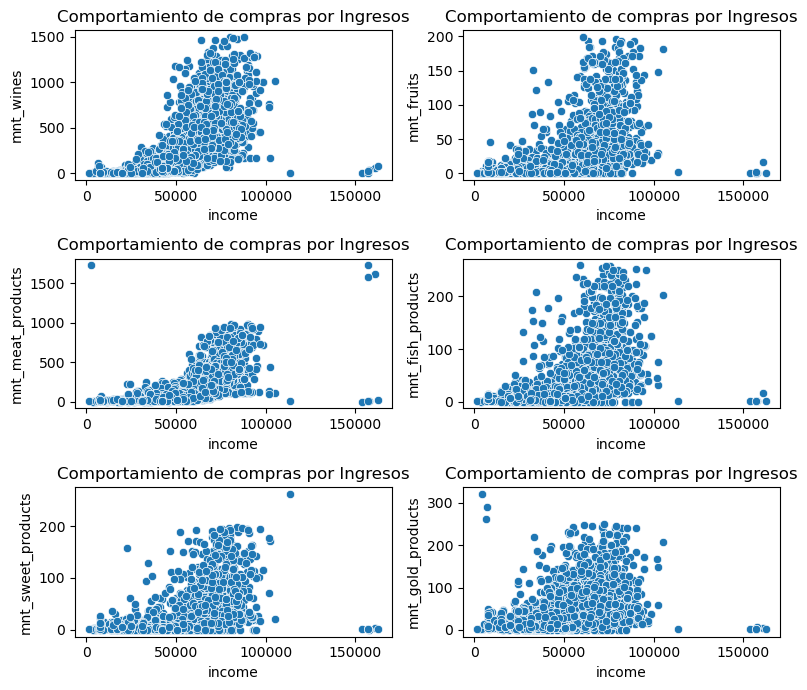

In [62]:
amount_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]

plot = 0
fig = plt.figure(figsize=(8,7))
for i in range(len(amount_list)):
    plot += 1
    ax = plt.subplot(3,2,plot)
    sns.scatterplot(x= mercadeo.income, y=mercadeo[amount_list[i]])
    plt.title("Comportamiento de compras por Ingresos")
plt.tight_layout()
plt.show()    

Todas estas graficas nos muestran que hay una fuerte relacion lineal positiva por cada ingreso y sus compras (mnt_type_products), sin embargo no hay evidencia que sea lineal, vamos hacer una anális a escala logaritmica.  

C:\Users\javij\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\javij\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\javij\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\javij\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\javij\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\javij\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in l

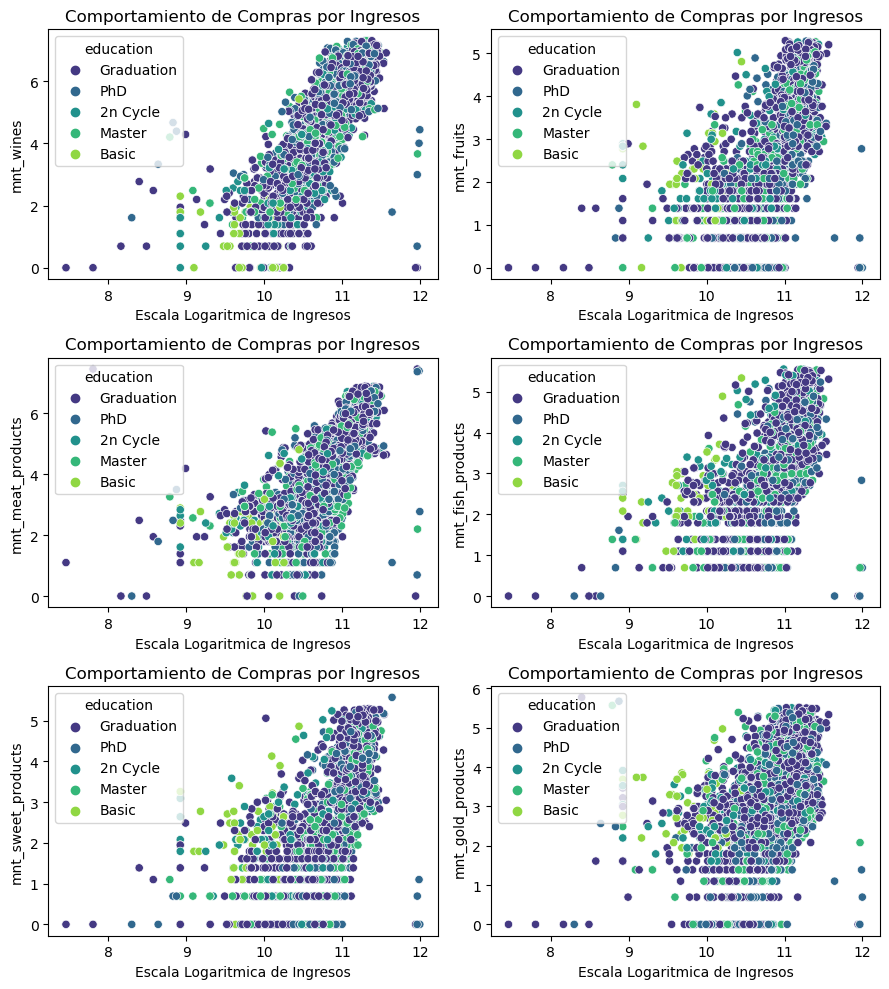

In [63]:
amount_list=["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]
axes=[None for column in amount_list]
plot = 0
fig = plt.figure(figsize=(9,10))
for i in range(len(amount_list)):
    plot +=1
    ax= plt.subplot(3,2,plot)
    sns.scatterplot(x= np.log(mercadeo.income), y= np.log(mercadeo[amount_list[i]]),
                    hue = mercadeo.education, palette="viridis")
    ax.set_xlabel("Escala Logaritmica de Ingresos")
    plt.title("Comportamiento de Compras por Ingresos")
plt.tight_layout()
plt.show()

Con las variables a escala logarítmica, es fácil ver que existe una relación lineal positiva bastante fuerte entre las variables en todos los ámbitos. Sin embargo, todavía es difícil ver cómo la educación juega un papel.


### Comportamiento de compra 

Un metodo de seaborn llamado .FaceGrid() se va utilizar para ver como la educación afecta el comportamiento de compras junto con los ingresos. Da una imagen mucho mas clara que el parametro de tono de graficos anteriores. En este análisis, se utilizan un bucle y una variable dinámica de Python para trazar seis conjuntos de graficos .FaceGrid(). 

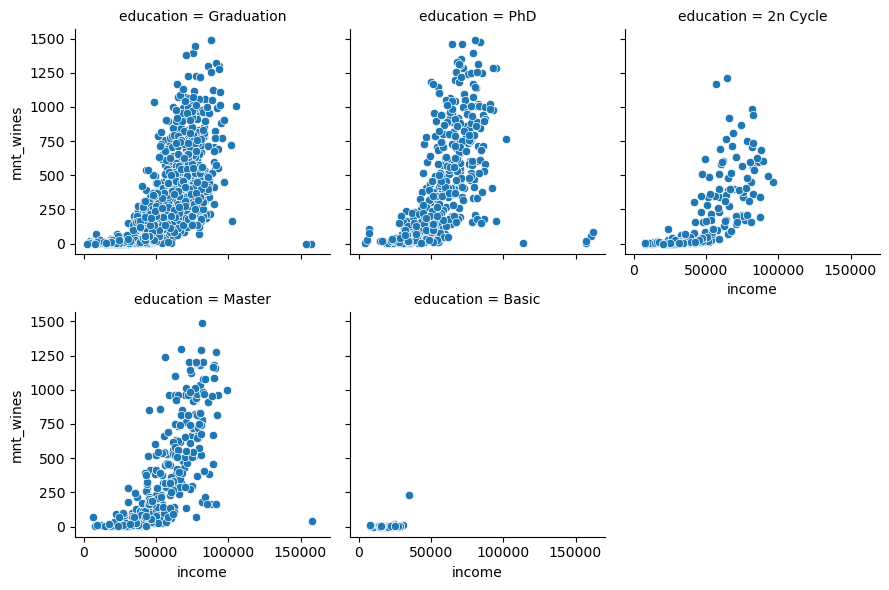

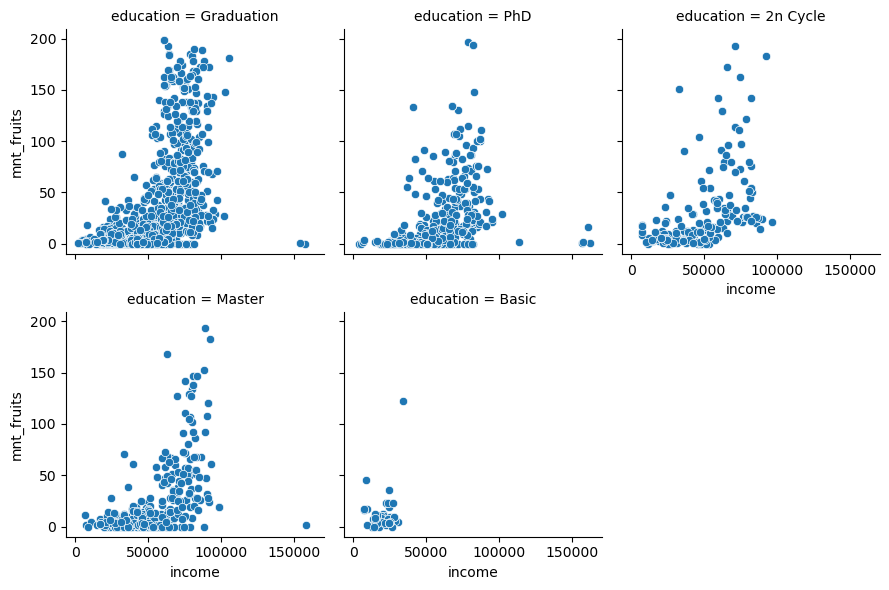

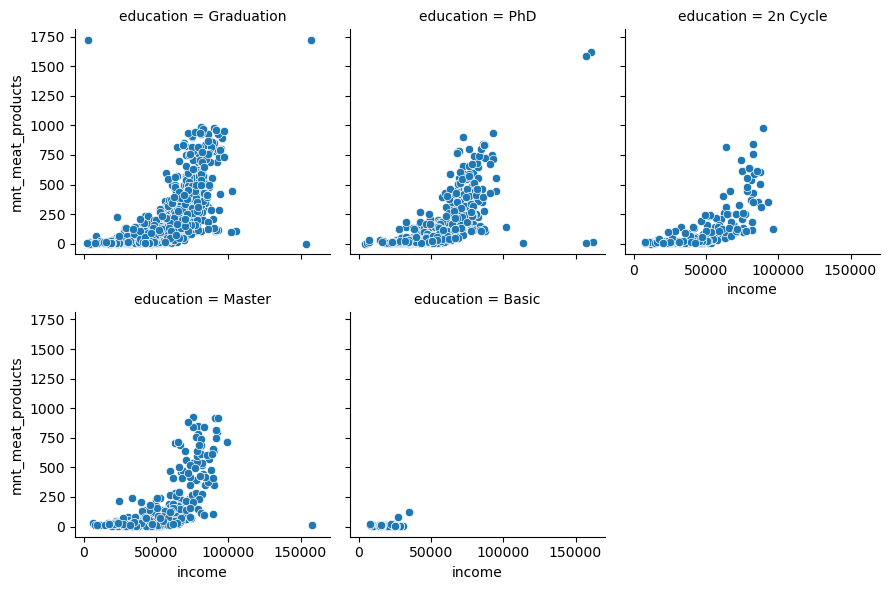

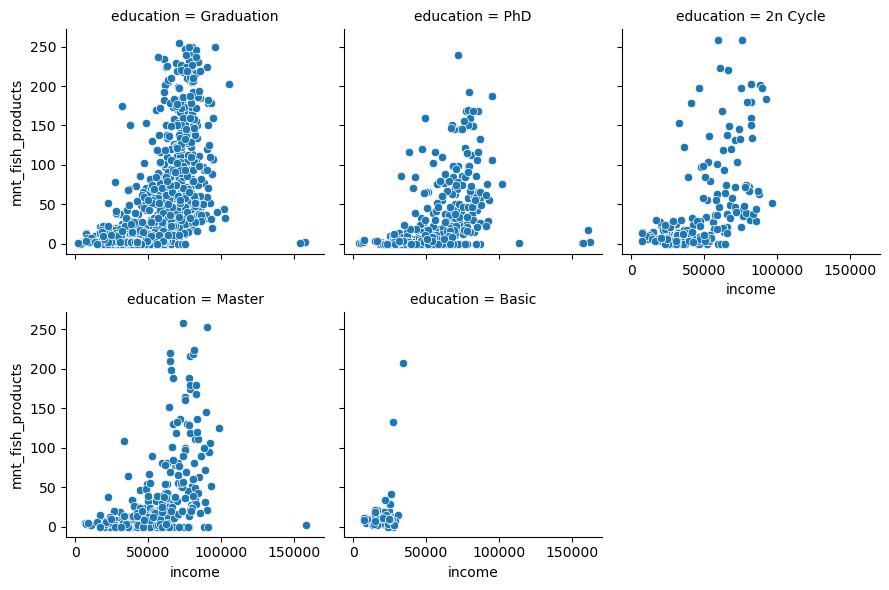

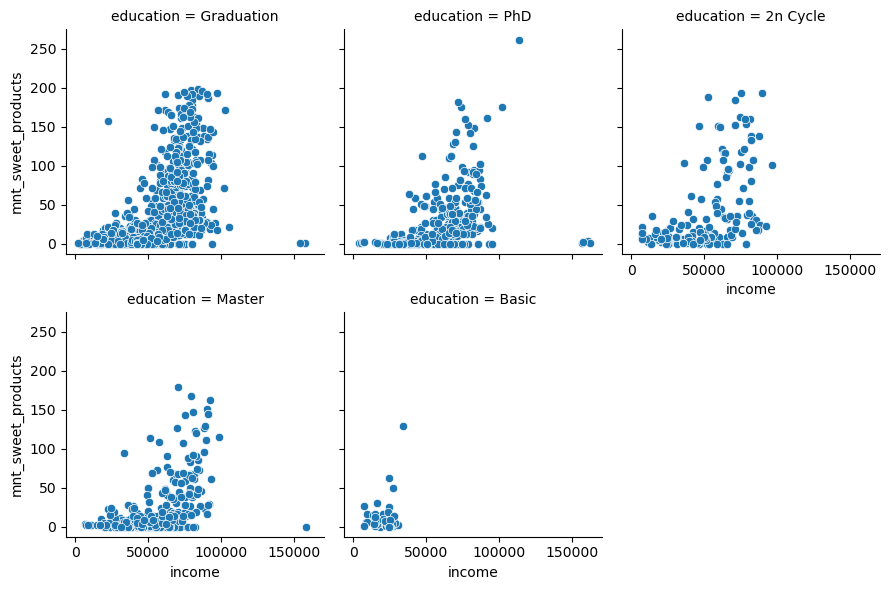

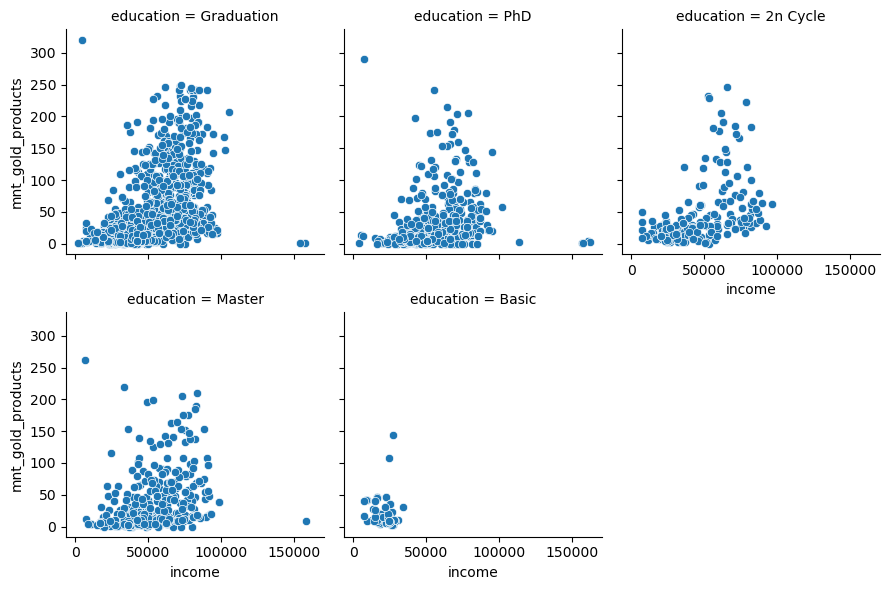

In [64]:
variable_names = {}
amount_list=["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]

for i in range(len(amount_list)):
    variable_names["g{0}".format(i)] = sns.FacetGrid(mercadeo, col = "education", col_wrap=3)
    variable_names["g{0}".format(i)].map(sns.scatterplot,"income", amount_list[i])
plt.show()

Despues de ver las graficas detalladamente la relacion entre ingreso, educacion, y el comportamiento de compra, podemos apreciar esto:

* Hay pocos compradores de nivel de educacion basico.
* Independientemente del nivel educativo del comprador, existe una relacion lineal positiva para cada producto.
* mnt_wines tiene positivamente fuerte, una relacion lineal con ingreso y educacion.

### Comportamiento de compras por edad

Nuestra ultima variable por analizar es la edad. Vamos a usar scatterplot() (Grafica de puntos) el metodo es para ver si hay una relación entre la edad y el comportamiento entre las variables.

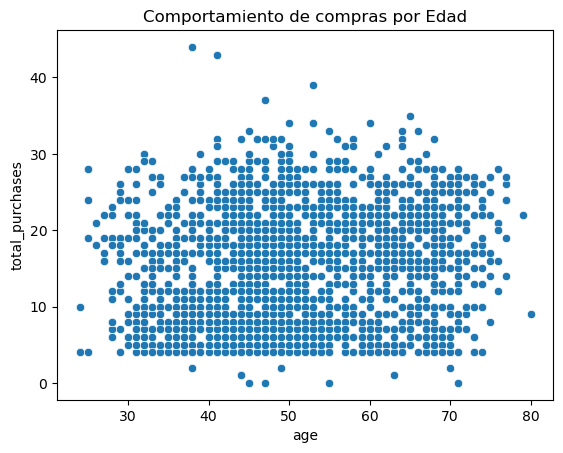

In [65]:
plt.figure()
sns.scatterplot(x= mercadeo.age, y=mercadeo["total_purchases"])
plt.title("Comportamiento de compras por Edad")
plt.show()

Es difícil ver si hay una relación lineal entre la edad y el total de compras.

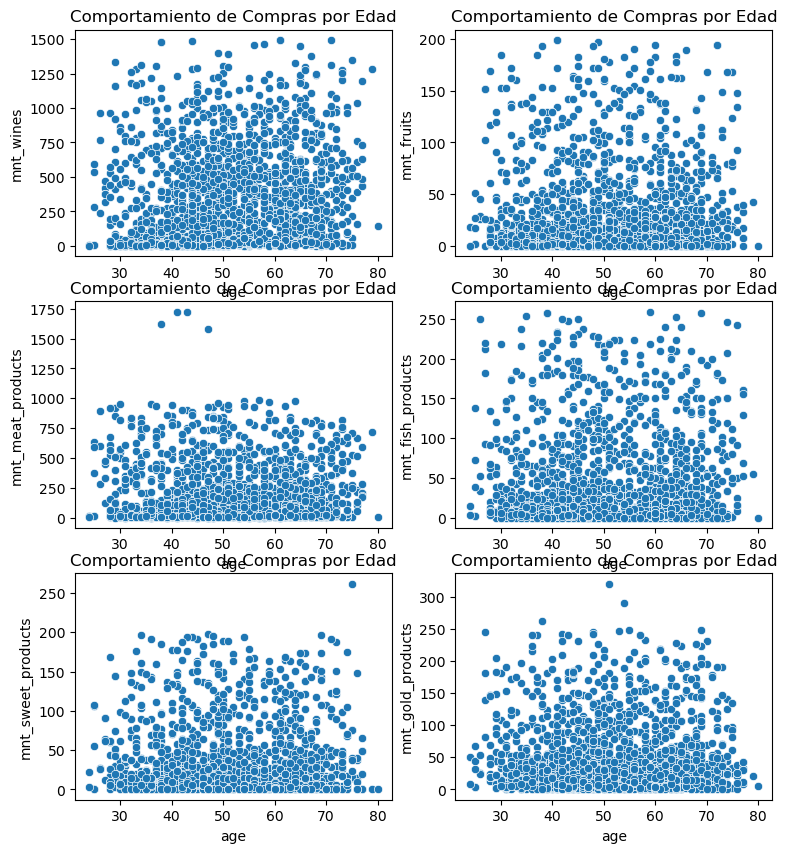

In [66]:
amount_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]
plot = 0
fig = plt.figure(figsize=(9,10))
for i in range(len(amount_list)):
    plot += 1
    ax = plt.subplot(3,2,plot)
    sns.scatterplot(x=mercadeo.age, y= mercadeo[amount_list[i]])
    plt.title("Comportamiento de Compras por Edad")

plt.show()


Sigue siendo difícil ver un patrón entre la edades y los tipos de compras. Por lo que hay que hacer otro tipo de análisis. 

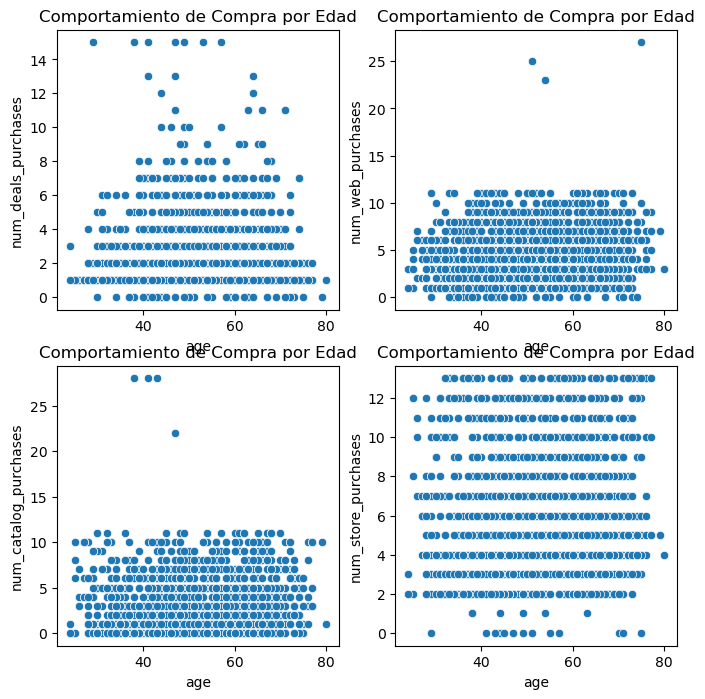

In [67]:
num_purchase_cols =["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]

plot = 0
fig = plt.figure(figsize=(8,8))
for i in range(len(num_purchase_cols)):
    plot += 1
    ax = plt.subplot(2,2,plot)
    sns.scatterplot(x = mercadeo.age, y = mercadeo[num_purchase_cols[i]])
    plt.title("Comportamiento de Compra por Edad")
plt.show()

Es difícil ver algun patrón entre la edad y las compras, hay que usar otro tipo de análisis.

Para hacer un análisis de la variable edad, hay que agregar una nueva columna llamada grupos de edad en el DataFrame que debe de contener el siguiente grupo.

* 18 a 35
* 36 a 50
* 51 a 70
* 71 y mayor

asi las variables categoricas nos dan un mejor análisis.

In [68]:
def age_group(age):
    if 18 <= age <= 35:
        return '18 a 35'
    elif 36 <= age <= 50:
        return '36 a 50'
    elif 51 <= age <= 70:
        return '51 a 70'
    else:
        return '71 a adulto mayor'

mercadeo["age_groups"] = mercadeo["age"].apply(age_group)

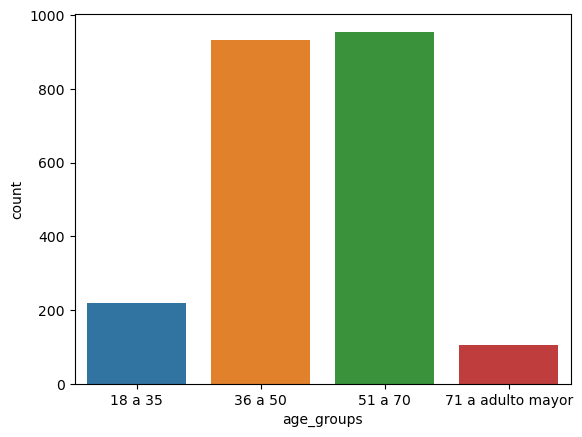

In [71]:
plt.figure()
sns.countplot(data=mercadeo, x="age_groups", order=["18 a 35", "36 a 50", "51 a 70", "71 a adulto mayor"])
plt.show()

En el grupo edad puede ser muy útil, ya que un gráfico de barras muestra que los grupos de edades 36 a 50 y 51 a 70 años dominan la compra en las tiendas.

Para seguir con este análisis vamos barras con el grupo de edades y la compra de productos.

In [72]:
age_plus = mercadeo.loc[:,('age', 'mnt_wines','mnt_fruits',"mnt_meat_products","mnt_fish_products", "mnt_sweet_products","mnt_gold_products")]

bins = [18,35,50,70,150]
labels = ["18 a 35", "36 a 50", "51 a 70", "71 a adulto mayor"]

age_plus["age_group"] = pd.cut(age_plus.age,bins = bins, labels = labels)
age_plus = age_plus.groupby('age_group').sum().reset_index()

In [73]:
print(age_plus)

           age_group    age  mnt_wines  mnt_fruits  mnt_meat_products  \
0            18 a 35   6957      56038        6642              44974   
1            36 a 50  41074     237527       22553             137596   
2            51 a 70  57225     329022       25336             159619   
3  71 a adulto mayor   7747      52709        3710              27281   

   mnt_fish_products  mnt_sweet_products  mnt_gold_products  
0               8801                6648               9271  
1              32303               23731              37050  
2              36399               25433              45998  
3               5776                4015               4845  


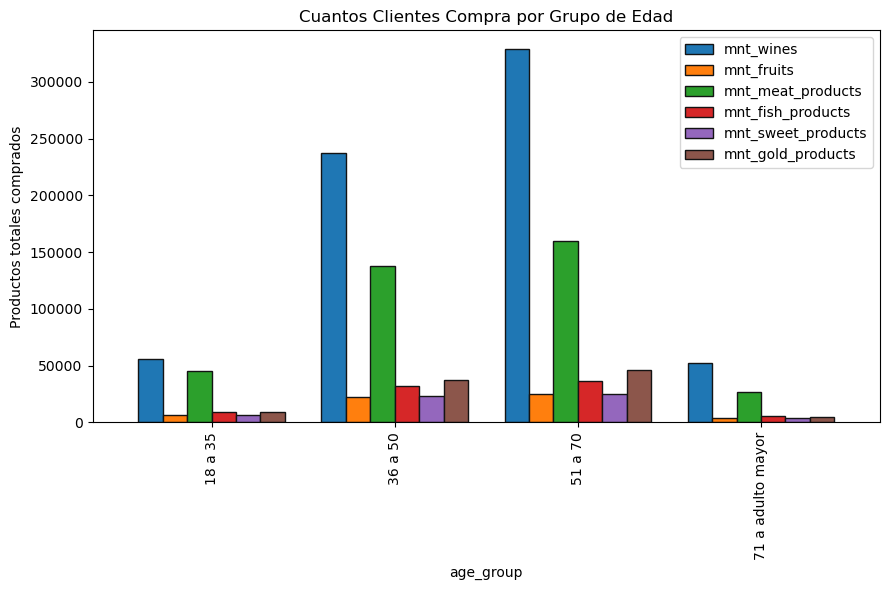

In [74]:
fig, ax = plt.subplots(figsize=(9,6))
col_products = ['mnt_wines','mnt_fruits',"mnt_meat_products","mnt_fish_products", "mnt_sweet_products","mnt_gold_products"]
age_plus.plot(x='age_group', y = col_products, kind = 'bar', ax = ax, width = 0.8, edgecolor  = "#131313")
plt.title("Cuantos Clientes Compra por Grupo de Edad")
plt.ylabel("Productos totales comprados")
plt.tight_layout()
plt.show()

En general no parece afectar los hábitos de compra, el vino es el articulo mas comprado seguido por la carne y el menos popular es la fruta ahora veremos si el grupo de edad afecta la cantidad de productos al comprar.

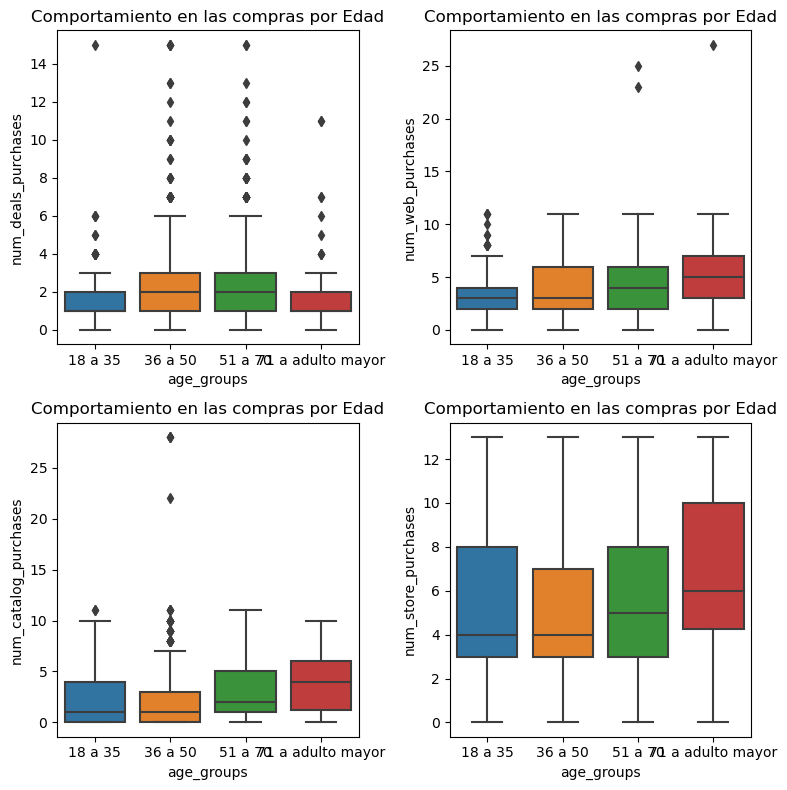

In [75]:
num_purchase_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
plot = 0
fig = plt.figure(figsize=(8,8))
for i in range(len(num_purchase_cols)):
    plot += 1
    ax = plt.subplot(2,2,plot)
    sns.boxplot(x= mercadeo["age_groups"], y = mercadeo[num_purchase_cols[i]], 
                order = ["18 a 35", "36 a 50", "51 a 70", "71 a adulto mayor"] )
    plt.title("Comportamiento en las compras por Edad")
plt.tight_layout()
plt.show()

Esta grafica muestran los interes por grupos de edad:

* 18 a 35 y 71 a adulto mayor no estan interesados en las ofertas.
* en promedio, 71 a adulto mayor edad de consumen tienen a comprar en online, tienda y por catalogo.
* 36 a 50 y 51 a 70 estan mas interesados en las ofertas.

Esta información es muy util dado que para ser marketing la tienda ya sabra a que publico quiere tratar y ya sae dee de incrementar el interes por los que tienen 36 a 50 y 71 a mayor. 

### Conclusiones

Se ha demostrado que los ingresos tienen la relación más fuerte con el comportamiento de compra de los clientes. Sin embargo, todavía se han notado ideas interesantes sobre la educación y la edad junto con age_group. Esta información sería muy útil para saber cómo esta tienda comercializa las ofertas a sus clientes y los precios de los artículos, como el vino, ya que los grupos de mayores ingresos tienden a dominar las ventas de alcohol. También existe la oportunidad de aumentar el mercado a los grupos de edad de 18 a 35 y 71 años y mayores para impulsar las ventas de productos.